<a href="https://colab.research.google.com/github/yogitjain3015/ML_PROJECT/blob/main/ML_20220701001.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing The Libraries**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import time
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score,mean_squared_error,r2_score,accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn import svm

# **Importing The Dataset**

In [ ]:
covid_data=pd.read_csv('/content/Covid_19.csv')

# **Dataset description and EDA**

In [ ]:
covid_data

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
0,Yes,Yes,Yes,Yes,Yes,No,No,No,No,Yes,...,Yes,Yes,No,Yes,No,Yes,Yes,No,No,Yes
1,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,...,Yes,No,No,No,Yes,Yes,No,No,No,Yes
2,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,...,Yes,Yes,Yes,No,No,No,No,No,No,Yes
3,Yes,Yes,Yes,No,No,Yes,No,No,Yes,Yes,...,No,No,Yes,No,Yes,Yes,No,No,No,Yes
4,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,...,No,Yes,No,Yes,No,Yes,No,No,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5429,Yes,Yes,No,Yes,Yes,Yes,Yes,No,No,No,...,Yes,Yes,No,No,No,No,No,No,No,Yes
5430,Yes,Yes,Yes,No,Yes,Yes,No,Yes,No,Yes,...,Yes,No,No,No,No,No,No,No,No,Yes
5431,Yes,Yes,Yes,No,No,No,No,No,Yes,No,...,No,No,No,No,No,No,No,No,No,No
5432,Yes,Yes,Yes,No,Yes,No,No,Yes,Yes,No,...,No,No,No,No,No,No,No,No,No,No


**Viewing The Dataset**

In [ ]:
covid_data.head()

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
0,Yes,Yes,Yes,Yes,Yes,No,No,No,No,Yes,...,Yes,Yes,No,Yes,No,Yes,Yes,No,No,Yes
1,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,...,Yes,No,No,No,Yes,Yes,No,No,No,Yes
2,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,...,Yes,Yes,Yes,No,No,No,No,No,No,Yes
3,Yes,Yes,Yes,No,No,Yes,No,No,Yes,Yes,...,No,No,Yes,No,Yes,Yes,No,No,No,Yes
4,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,...,No,Yes,No,Yes,No,Yes,No,No,No,Yes


In [ ]:
covid_data.shape

(5434, 21)

In [ ]:
covid_data.columns

Index(['Breathing Problem', 'Fever', 'Dry Cough', 'Sore throat',
       'Running Nose', 'Asthma', 'Chronic Lung Disease', 'Headache',
       'Heart Disease', 'Diabetes', 'Hyper Tension', 'Fatigue ',
       'Gastrointestinal ', 'Abroad travel', 'Contact with COVID Patient',
       'Attended Large Gathering', 'Visited Public Exposed Places',
       'Family working in Public Exposed Places', 'Wearing Masks',
       'Sanitization from Market', 'COVID-19'],
      dtype='object')

In [ ]:
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5434 entries, 0 to 5433
Data columns (total 21 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Breathing Problem                        5434 non-null   object
 1   Fever                                    5434 non-null   object
 2   Dry Cough                                5434 non-null   object
 3   Sore throat                              5434 non-null   object
 4   Running Nose                             5434 non-null   object
 5   Asthma                                   5434 non-null   object
 6   Chronic Lung Disease                     5434 non-null   object
 7   Headache                                 5434 non-null   object
 8   Heart Disease                            5434 non-null   object
 9   Diabetes                                 5434 non-null   object
 10  Hyper Tension                            5434 non-null   obj

In [ ]:
covid_data.describe().T

,count,unique,top,freq
Breathing Problem,5434,2,Yes,3620
Fever,5434,2,Yes,4273
Dry Cough,5434,2,Yes,4307
Sore throat,5434,2,Yes,3953
Running Nose,5434,2,Yes,2952
Asthma,5434,2,No,2920
Chronic Lung Disease,5434,2,No,2869
Headache,5434,2,Yes,2736
Heart Disease,5434,2,No,2911
Diabetes,5434,2,No,2846


**Preprocessing**

In [ ]:
missing_values = covid_data.isnull().sum()

percent_missing = covid_data.isnull().sum()/covid_data.shape[0]*100

value = {
    'missing_values' :missing_values ,
    'percent_missing %' : percent_missing
}
frame = pd.DataFrame(value)
frame

,missing_values,percent_missing %
Breathing Problem,0,0.0
Fever,0,0.0
Dry Cough,0,0.0
Sore throat,0,0.0
Running Nose,0,0.0
Asthma,0,0.0
Chronic Lung Disease,0,0.0
Headache,0,0.0
Heart Disease,0,0.0
Diabetes,0,0.0


# **Distribution and EDA**

<Axes: >

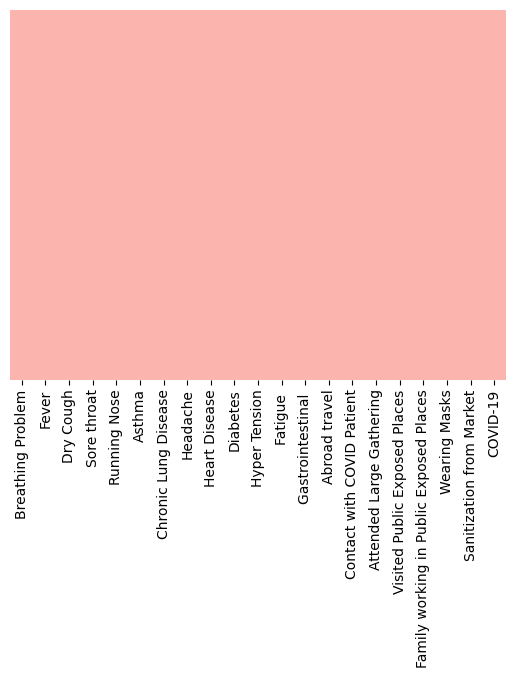

In [ ]:
sns.heatmap(covid_data.isnull(),yticklabels=False,cbar=False,cmap='Pastel1')

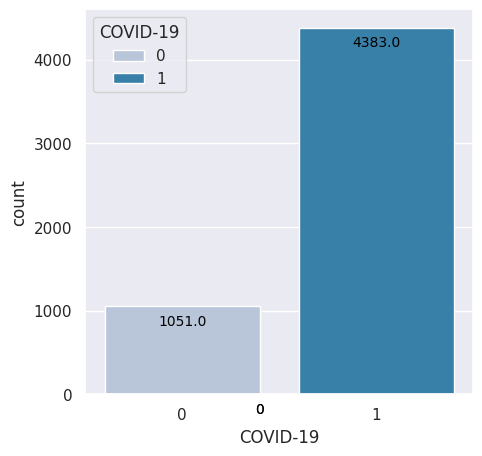

In [ ]:
ax = sns.countplot(x='COVID-19',hue='COVID-19',data=covid_data, palette="PuBu")
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x() + 0.4, p.get_height() + 100),
                ha='center', va = 'top', color='black', size=10)
plt.show()


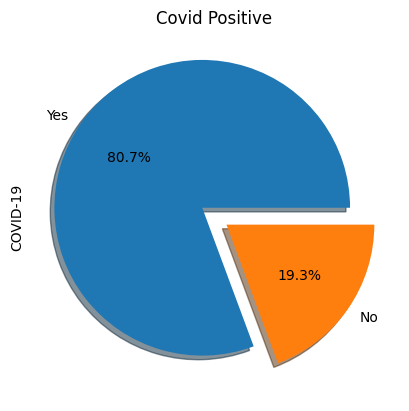

In [ ]:
covid_data["COVID-19"].value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',shadow=True)
plt.title('Covid Positive');

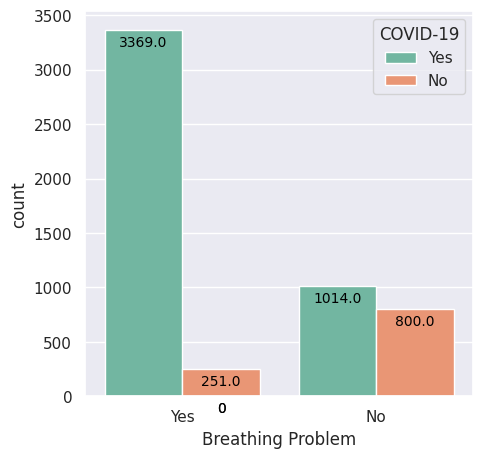

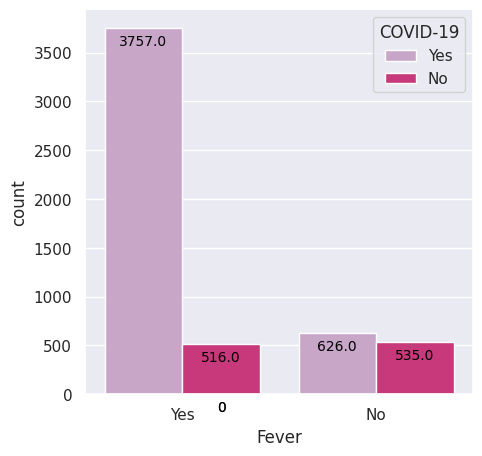

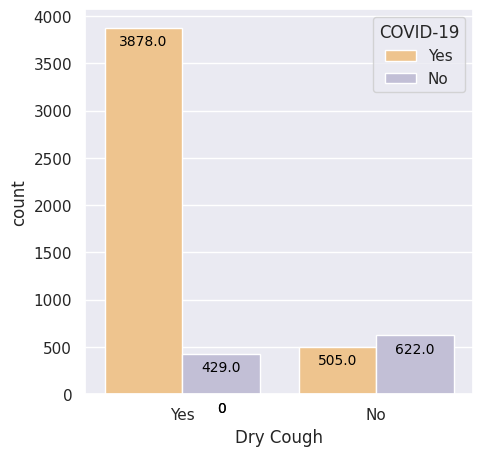

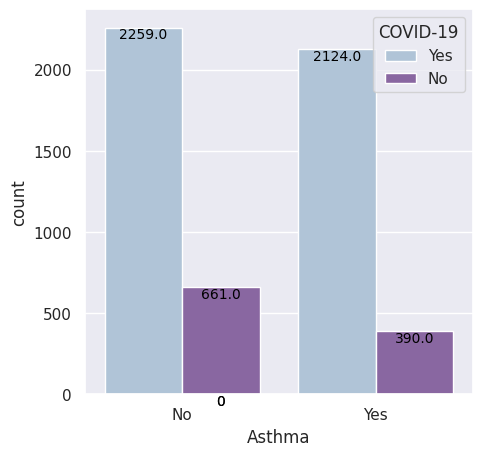

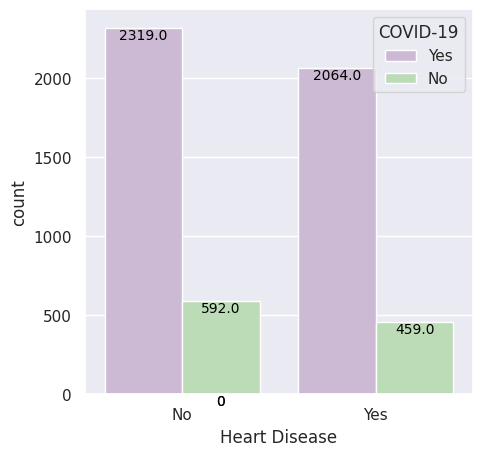

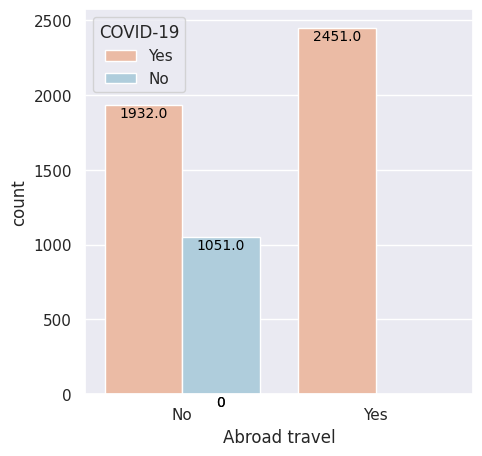

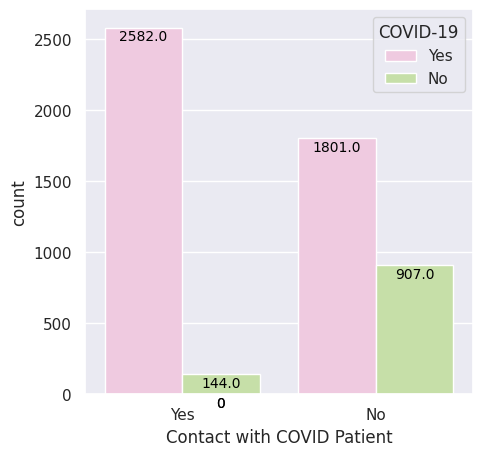

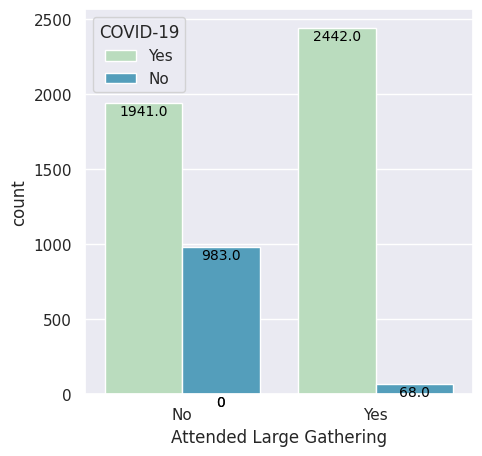

In [ ]:
sns.set_theme(rc={'figure.figsize':(5,5)})

ax = sns.countplot(x='Breathing Problem',hue='COVID-19',data=covid_data,palette="Set2",)
for p in ax.patches:
  ax.annotate(f'\n{p.get_height()}',(p.get_x()+0.2,p.get_height()+100),
              ha='center', va='top',color='black',size=10)
plt.show()
print("\n")

ax = sns.countplot(x='Fever',hue='COVID-19',data=covid_data,palette="PuRd")
for p in ax.patches:
  ax.annotate(f'\n{p.get_height()}',(p.get_x()+0.2,p.get_height()+100),
              ha='center', va='top', color='black', size=10)
plt.show()
print("\n")

ax = sns.countplot(x='Dry Cough',hue='COVID-19',data=covid_data,palette="PuOr")
for p in ax.patches:
  ax.annotate(f'\n{p.get_height()}',(p.get_x()+0.2,p.get_height()+100),
              ha='center', va='top', color='black', size=10)
plt.show()
print("\n")

ax = sns.countplot(x='Asthma',hue='COVID-19',data=covid_data,palette="BuPu")
for p in ax.patches:
  ax.annotate(f'\n{p.get_height()}',(p.get_x()+0.2,p.get_height()+100),
              ha='center', va='top', color='black', size=10)
plt.show()
print("\n")

ax = sns.countplot(x='Heart Disease',hue='COVID-19',data=covid_data,palette="PRGn")
for p in ax.patches:
  ax.annotate(f'\n{p.get_height()}',(p.get_x()+0.2,p.get_height()+100),
              ha='center', va='top', color='black', size=10)
plt.show()
print("\n")

ax = sns.countplot(x='Abroad travel',hue='COVID-19',data=covid_data,palette="RdBu")
for p in ax.patches:
  ax.annotate(f'\n{p.get_height()}',(p.get_x()+0.2,p.get_height()+100),
              ha='center', va='top', color='black', size=10)
plt.show()
print("\n")

ax = sns.countplot(x='Contact with COVID Patient',hue='COVID-19',data=covid_data,palette="PiYG")
for p in ax.patches:
  ax.annotate(f'\n{p.get_height()}',(p.get_x()+0.2,p.get_height()+100),
              ha='center', va='top', color='black', size=10)
plt.show()
print("\n")

ax = sns.countplot(x='Attended Large Gathering',hue='COVID-19',data=covid_data,palette="GnBu")
for p in ax.patches:
  ax.annotate(f'\n{p.get_height()}',(p.get_x()+0.2,p.get_height()+100),
              ha='center', va='top', color='black', size=10)
plt.show()
print("\n")

# **Label Encoding**

In [ ]:
e = LabelEncoder()

In [ ]:
covid_data['Breathing Problem'] = e.fit_transform(covid_data['Breathing Problem'])
covid_data['Fever'] = e.fit_transform(covid_data['Fever'])
covid_data['Dry Cough'] = e.fit_transform(covid_data['Dry Cough'])
covid_data['Sore throat'] = e.fit_transform(covid_data['Sore throat'])
covid_data['Running Nose'] = e.fit_transform(covid_data['Running Nose'])
covid_data['Asthma'] = e.fit_transform(covid_data['Asthma'])
covid_data['Chronic Lung Disease'] = e.fit_transform(covid_data['Chronic Lung Disease'])
covid_data['Headache'] = e.fit_transform(covid_data['Headache'])
covid_data['Heart Disease'] = e.fit_transform(covid_data['Heart Disease'])
covid_data['Diabetes'] = e.fit_transform(covid_data['Diabetes'])
covid_data['Hyper Tension'] = e.fit_transform(covid_data['Hyper Tension'])
covid_data['Abroad travel'] = e.fit_transform(covid_data['Abroad travel'])
covid_data['Contact with COVID Patient'] = e.fit_transform(covid_data['Contact with COVID Patient'])
covid_data['Attended Large Gathering'] = e.fit_transform(covid_data['Attended Large Gathering'])
covid_data['Visited Public Exposed Places'] = e.fit_transform(covid_data['Visited Public Exposed Places'])
covid_data['Family working in Public Exposed Places'] = e.fit_transform(covid_data['Family working in Public Exposed Places'])
#covid_data['Wearing Masks'] = e.fit_transform(covid_data['Wearing Masks'])
#covid_data['Sanitization from Market'] = e.fit_transform(covid_data['Sanitization from Market'])
covid_data['COVID-19'] = e.fit_transform(covid_data['COVID-19'])
covid_data['Gastrointestinal '] = e.fit_transform(covid_data['Gastrointestinal '])
covid_data['Fatigue '] = e.fit_transform(covid_data['Fatigue '])

In [ ]:
covid_data.head()

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
0,1,1,1,1,1,0,0,0,0,1,...,1,1,0,1,0,1,1,0,0,1
1,1,1,1,1,0,1,1,1,0,0,...,1,0,0,0,1,1,0,0,0,1
2,1,1,1,1,1,1,1,1,0,1,...,1,1,1,0,0,0,0,0,0,1
3,1,1,1,0,0,1,0,0,1,1,...,0,0,1,0,1,1,0,0,0,1
4,1,1,1,1,1,0,1,1,1,1,...,0,1,0,1,0,1,0,0,0,1


In [ ]:
covid_data

In [ ]:
sns.heatmap(covid_data,cmap='viridis')

# EDA

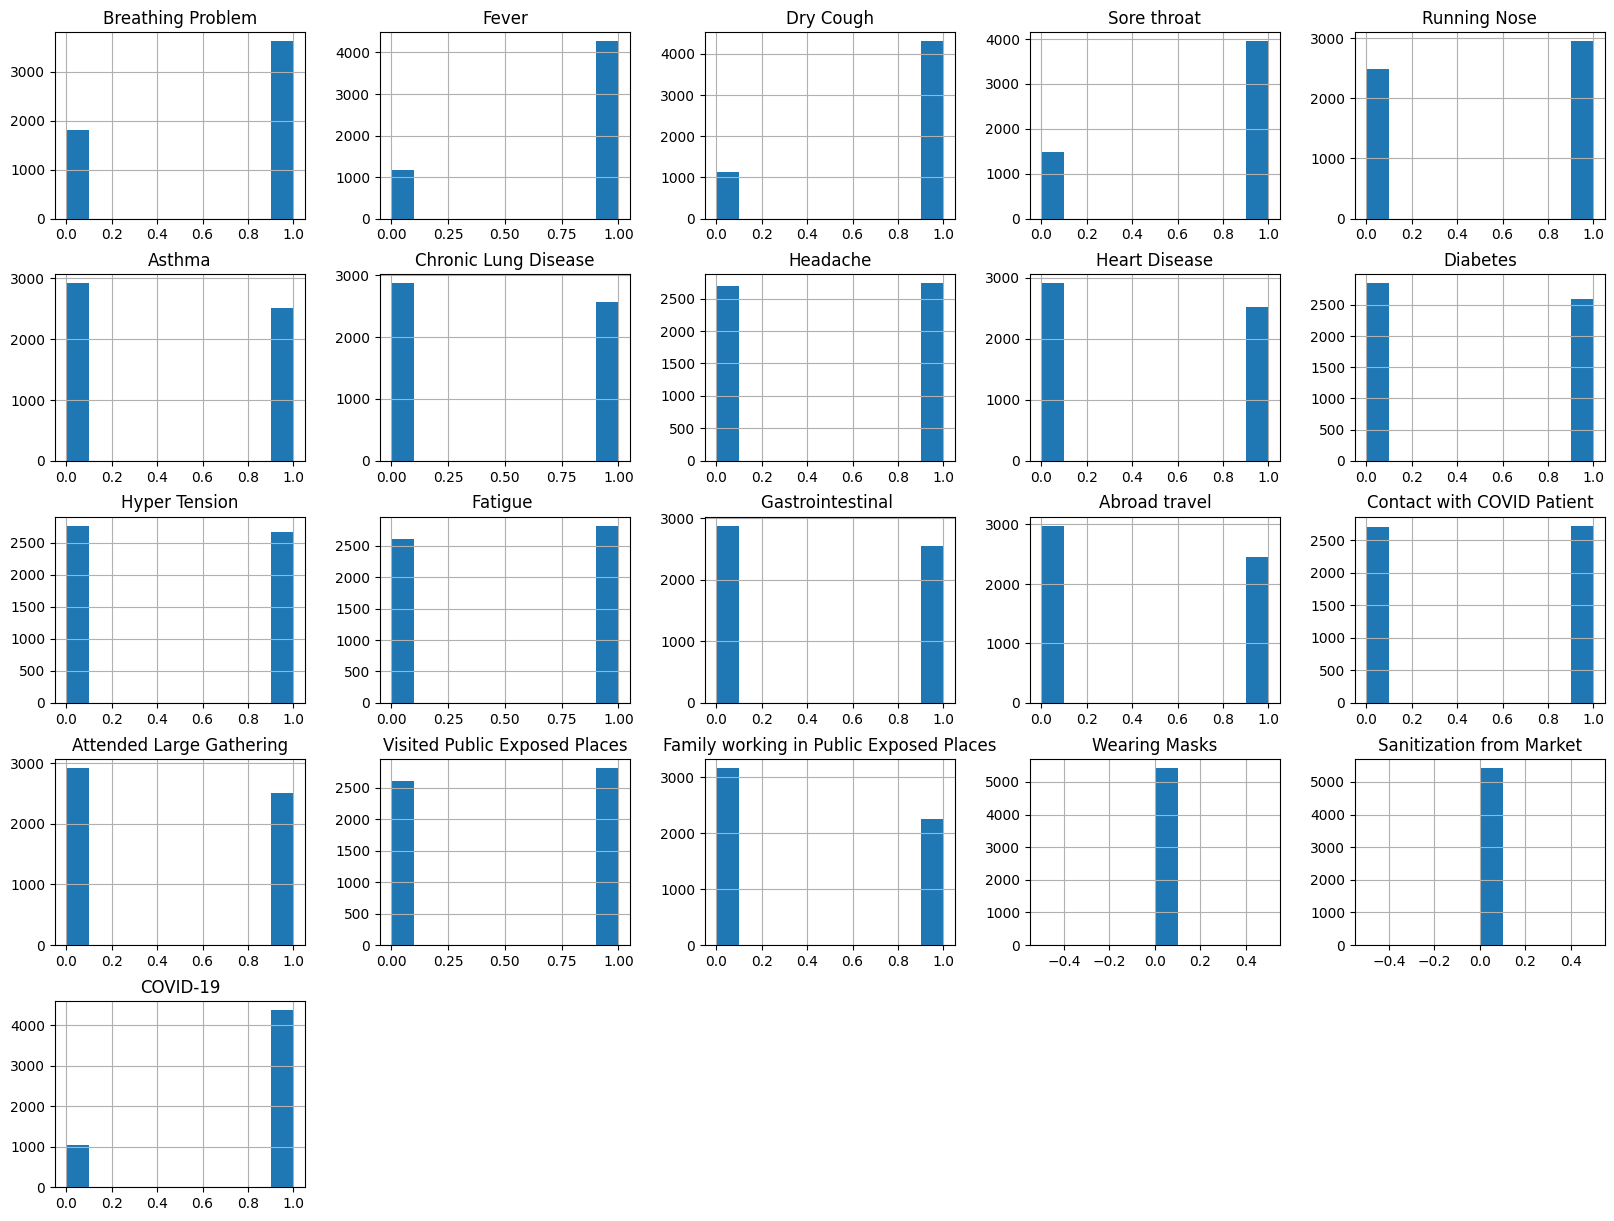

In [ ]:
covid_data.hist(figsize=(20,15));

No    5434
Name: Wearing Masks, dtype: int64


<Axes: xlabel='Wearing Masks', ylabel='count'>

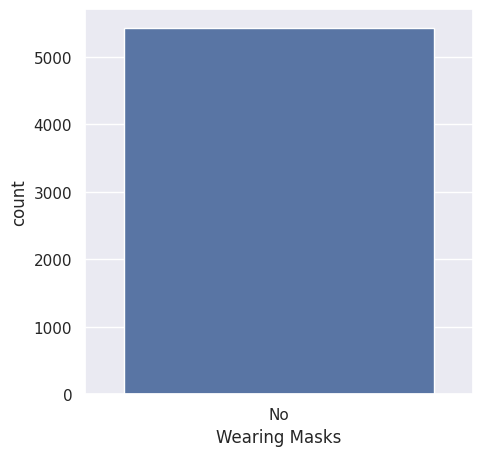

In [ ]:
print(covid_data['Wearing Masks'].value_counts())

sns.countplot(x='Wearing Masks',data=covid_data)

No    5434
Name: Sanitization from Market, dtype: int64


<Axes: xlabel='Sanitization from Market', ylabel='count'>

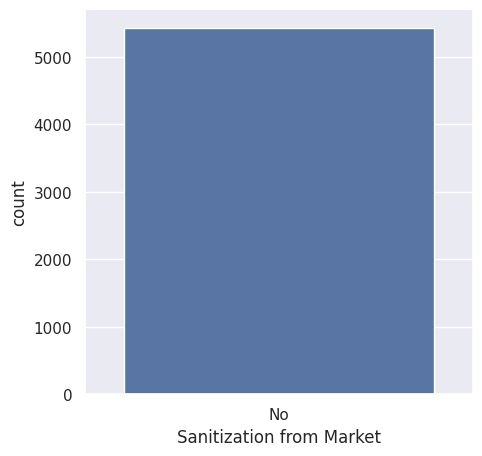

In [ ]:
print(covid_data['Sanitization from Market'].value_counts())
sns.countplot(x= 'Sanitization from Market',data=covid_data)

In [ ]:
covid_data=  covid_data.drop('Wearing Masks' ,axis=1)
covid_data = covid_data.drop('Sanitization from Market' , axis=1)

In [ ]:
covid_data.columns

# **Correlation Matrix**

In [ ]:
covid_data.corr()

In [ ]:
plt.figure(figsize = (25,20))
sns.heatmap(covid_data.corr() ,annot = True , cmap = "Set3")

# **independent/dependent variables**

In [ ]:
x=covid_data.drop('COVID-19',axis=1)
y=covid_data['COVID-19']

In [ ]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: COVID-19, dtype: int64

# **Splitting of the Dataset**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20 ,random_state = 101)

In [ ]:
x_train

# **Evaluation Methods**

In [ ]:
accuracies = {}
algo_time = {}
r2_scores = {}
mean_squared_errors = {}
roc_auc_scores = {}

In [ ]:
def print_performance2(yt,clf,clf_name):
  y_pred=clf.predict(x_test)
  roc_auc_scores[clf_name] = roc_auc_score(yt,y_pred)*100
  mean_squared_errors[clf_name] = mean_squared_error(yt,y_pred)*100
  r2_scores[clf_name] = r2_score(yt,y_pred)*100
  accuracies[clf_name] = clf.score(x_train,y_train)*100
  print("ROC_AUC value : ",roc_auc_scores[clf_name],"%",'\n')
  print("Mean Sqaured Error : ",mean_squared_errors[clf_name],"%")
  print("\nR2 Score is : ",r2_scores[clf_name],"%")
  print("\nAccuracy Acore :",accuracies[clf_name],"%")
  print("\nClassification Report :","\n",classification_report(yt,y_pred))

  cf_matrix =confusion_matrix(yt,y_pred)

  fig, ax = plt.subplots(figsize=(2,2))
  ax.matshow(cf_matrix,cmap=plt.cm.cool, alpha= 0.3)
  for i in range(cf_matrix.shape[0]):
    for j in range(cf_matrix.shape[1]):
      ax.text(x=j,y=i , s=cf_matrix[i,j] , va ='center', ha='center', size='xx-large')

  plt.xlabel('Predictions',fontsize=18)
  plt.ylabel('Actuals',fontsize=18)
  plt.title('Confusion Matrix',fontsize=18)

# **Training The Model**

## **LOGISTIC REGRESSION**

LOGISTIC REGRESSION
ROC_AUC value :  93.23107498945218 % 

Mean Sqaured Error :  3.035878564857406 %

R2 Score is :  80.08627006861634 %

Accuracy Acore : 97.03243616287095 %

Classification Report : 
               precision    recall  f1-score   support

           0       0.96      0.87      0.92       204
           1       0.97      0.99      0.98       883

    accuracy                           0.97      1087
   macro avg       0.97      0.93      0.95      1087
weighted avg       0.97      0.97      0.97      1087



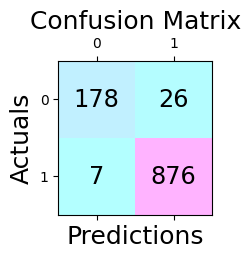

In [ ]:
print("LOGISTIC REGRESSION")
start= time.time()
lr = LogisticRegression()
lr.fit(x_train , y_train)
end = time.time()

print_performance2(y_test,lr,'LOGISTIC REGRESSION')
algo_time['LOGISTIC REGRESSION'] = end-start

## **K-NEAREST NEIGHBOURS**

In [ ]:
start = time.time()
knn = KNeighborsClassifier()

param_grid = {'n_neighbors' : np.arange(1,50)}
knn_cv = GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(x_train,y_train)
end = time.time()
algo_time['K-NEAREST NEIGHBOURS'] = end-start

In [ ]:
print("The best parameter we have is: {}" .format(knn_cv.best_params_))
print("The best score er have achieved is: {}".format(knn_cv.best_score_))

The best parameter we have is: {'n_neighbors': 2}
The best score er have achieved is: 0.9809068423210718


K-NEAREST NEIGHBOURS ALGO
ROC_AUC value :  97.47213154797593 % 

Mean Sqaured Error :  2.5758969641214353 %

R2 Score is :  83.10350187640175 %

Accuracy Acore : 98.3666896710375 %

Classification Report : 
               precision    recall  f1-score   support

           0       0.90      0.98      0.93       204
           1       0.99      0.97      0.98       883

    accuracy                           0.97      1087
   macro avg       0.95      0.97      0.96      1087
weighted avg       0.98      0.97      0.97      1087



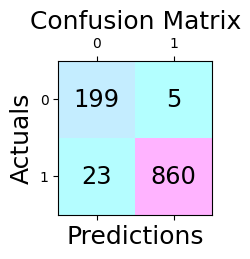

In [ ]:
print("K-NEAREST NEIGHBOURS ALGO")
print_performance2(y_test,knn_cv,'K-NEAREST NEIGHBOURS')

## **RANDOM FOREST**

In [ ]:
rf_start = time.time()
rfc = RandomForestClassifier(random_state = 42)
param_grid = {
    'n_estimators':[200,500],
    'max_features':['auto','sqrt','log2'],
    'max_depth': [4,5,6,7,8],
    'criterion': ['gini','entropy']
}

CV_rfc = GridSearchCV(estimator=rfc,param_grid=param_grid,cv=5)
CV_rfc.fit(x_train,y_train)
rf_end = time.time()
algo_time['RANDOM FOREST TREE'] = rf_end-rf_start

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

In [ ]:
print("The best parameter we have is: {}" .format(CV_rfc.best_params_))
print("The best score we have is: {}" .format(CV_rfc.best_score_*100))

In [ ]:
print("RANDOM FOREST TREE")
print_performance2(y_test,CV_rfc,'RANDOM FOREST TREE')

# **Comparison Between Results**

In [ ]:
!conda install -c plotly plotly
!pip install colorama

/bin/bash: line 1: conda: command not found


In [ ]:
colors = ["purple", "green", "orange", "blue", "red", "yellow", "magenta"]

sns.set_style("whitegrid")
plt.figure(figsize=(10,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
plt.xticks(rotation=90)
ax = sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.show()

## **ACCURACY COMPARISON**

In [ ]:
import plotly.express as px
fig = px.bar(x=list(accuracies.keys()),y=list(accuracies.values()))
fig.update_traces(marker_color='paleturquoise',marker_line_color='rgb(8,48,107)'),
fig.update_layout(title = "Accuracy Comparison",xaxis_title = "Model",yaxis_title = "Accuracy")
fig.show()

## **ALGORITHM TIME COMPARISON**

In [ ]:
fig = px.bar(x = list(algo_time.keys()),y = list(algo_time.values()))
fig.update_traces(marker_color = 'teal',marker_line_color = "rgb(8,48,107)")
fig.update_layout(title = "Algorithm Time Copmarison",xaxis_title="Model",yaxis_title="Algo_Time")
fig.show()

## **R2 SCORE COMPARISON**

In [ ]:
fig = px.bar(x=list(r2_scores.keys()),y=list(r2_scores.values()))
fig.update_traces(marker_color='darkslategray',marker_line_color='rgb(8,48,107)')
fig.update_layout(title="R2 Score Comparison",xaxis_title="Model",yaxis_title="R2_Scores")
fig.show()

## **MEAN SQUARED ERROR COMPARISON**

In [ ]:
fig = px.bar(x= list(mean_squared_errors.keys()),y=list(mean_squared_errors.values()))
fig.update_traces(marker_color='cadetblue',marker_line_color='rgb(8,48,107)')
fig.update_layout(title="Mean Squared Error Comparison",xaxis_title="Model",yaxis_title="Mean Squared Error")
fig.show()

##**ROC SCORE COMPARISON**

In [ ]:
fig = px.bar(x = list(roc_auc_scores.keys()),y = list(roc_auc_scores.values()))
fig.update_traces(marker_color='darkslategrey',marker_line_color='rgb(8,48,107)')
fig.update_layout(title="ROC SCORE COMPARISON",xaxis_title="Model",yaxis_title="ROC_Score")
fig.show()

# **A Total Comparison**

In [ ]:
import plotly.graph_objects as go
Algos = list(roc_auc_scores.keys())

fig = go.Figure(data=[
    go.Bar(name='Accuracies',x=Algos,y=list(accuracies.values()),marker_color='paleturquoise'),
    go.Bar(name='R2 Scores',x=Algos,y=list(r2_scores.values()),marker_color='darkslategray'),
    go.Bar(name='Mean Squared Error',x=Algos,y=list(mean_squared_errors.values()),marker_color='teal'),
    go.Bar(name="ROC AUV Scores",x=Algos,y=list(roc_auc_scores.values()),marker_color='cadetblue')
])
fig.update_layout(barmode='group')
fig.show()

# **Test Report**

In [ ]:
#x_test.head()
y_test.head()

977     1
2309    1
356     1
2478    1
4963    0
Name: COVID-19, dtype: int64

In [ ]:
import colorama
from colorama import Fore

print("COVID PREDICTION BASED ON ML ALGORITHMS")
print("Enter 1 for Yes and 0 for No")
Breathing_Problem = int(input("Does the patient have breathing problem ? "))
Fever = int(input("Does the patient have fever ? "))
Dry_Cough = int(input("Does the patient have dry cough ? "))
Sore_throat = int(input("Does the patient have sore throat ? "))
Running_Nose = int(input("Does the patient have running nose ? "))
Asthma = int(input("Does the patient have any record of asthma ? "))
Chronic_Lung_Disease = int(input("Does the patient have any records of chronic lung disease ? "))
Headache = int(input("Is the patient having headche ? "))
Heart_Disease = int(input("Does the patient have any record of any heart disease ? "))
Diabetes = int(input("Does the patient have diabetes ? "))
Hyper_Tension = int(input("Does the patient have hyper tension ? "))
Fatigue = int(input("Does the patient experience fatigue ? "))
Gastrointestinal = int(input("Does the patient have any gastrointestinal disorders ? "))
Abroad_travel = int(input("Has the patient travelled abroad recently ? "))
Contact_with_COVID_Patient = int(input("Was the patient in contact with a covid patient recently ? "))
Attended_Large_Gathering = int(input("Did the patient attend any large gathering event recently ? "))
Visited_Public_Exposed_Places = int(input("Did the patient visit any public exposed places recently ? "))
Family_working_in_Public_Exposed_Places = int(input("Does the patient have any family member working in public exposed places ? "))

patient = [[Breathing_Problem,Fever,Dry_Cough,Sore_throat,Running_Nose,Asthma,Chronic_Lung_Disease,Headache,
            Heart_Disease,Diabetes,Hyper_Tension,Fatigue,Gastrointestinal,Abroad_travel,
            Contact_with_COVID_Patient,Attended_Large_Gathering,
            Visited_Public_Exposed_Places,Family_working_in_Public_Exposed_Places]]
result = knn_cv.predict(patient)
print("\nResults : ",result)

if result == 1:
    print(Fore.RED + 'You may be affected with COVID-19 virus! Please get RTPCR test ASAP and stay in Quarantine for 14 days!')
    print()
else :
    print(Fore.GREEN + 'You do not have any symptoms of COVID-19. Stay home! Stay safe!')
    print()

COVID PREDICTION BASED ON ML ALGORITHMS
Enter 1 for Yes and 0 for No
Does the patient have breathing problem ? 0
Does the patient have fever ? 0
Does the patient have dry cough ? 1
Does the patient have sore throat ? 1
Does the patient have running nose ? 0
Does the patient have any record of asthma ? 1
Does the patient have any records of chronic lung disease ? 0
Is the patient having headche ? 1
Does the patient have any record of any heart disease ? 0
Does the patient have diabetes ? 1
Does the patient have hyper tension ? 0
Does the patient experience fatigue ? 1
Does the patient have any gastrointestinal disorders ? 1
Has the patient travelled abroad recently ? 0
Was the patient in contact with a covid patient recently ? 0
Did the patient attend any large gathering event recently ? 0
Did the patient visit any public exposed places recently ? 0
Does the patient have any family member working in public exposed places ? 0

Results :  [0]
You do not have any symptoms of COVID-19. Stay

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but KNeighborsClassifier was fitted with feature names

